**Data Governance Practice Activity:**
This activity helps to understand data governance principles using a detailed dataset. You will work through data quality checks, privacy protection, metadata management, and visualization. Let's get started!

**Step 1: Install Required Tools**

In [ ]:
!pip install pandas matplotlib

**Step 2: Load the Dataset**

In [3]:
import pandas as pd

# Load the dataset
file_path = "sample_data/salesdata.csv"  # Update with your path if needed
data = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   CustomerID     Name              Email         Region PurchaseAmount
0         101    Alice  alice@example.com          North         250.75
1         102      Bob    bob@example.com           East          120.5
2         103  Charlie      invalid_email  InvalidRegion            330
3         104    David  david@example.com           West           -150
4         105      Eve    eve@example.com          North            200


**Step 3: Perform Data Quality Checks**


In [4]:
# 1. Check for Missing Values:
# Why? Missing values indicate gaps in data that may affect downstream processes.
# Expected Output: You will find missing values in the Email column.

print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
CustomerID        0
Name              0
Email             1
Region            0
PurchaseAmount    1
dtype: int64


In [5]:
# 2. Check for Invalid Purchase Amounts:
# Why? Purchase amounts must be non-negative numbers. Negative or non-numeric values are invalid.
#Expected Output: Rows with negative values or NaN due to non-numeric data.
data['PurchaseAmount'] = pd.to_numeric(data['PurchaseAmount'], errors='coerce')
invalid_amounts = data[data['PurchaseAmount'] < 0]
print("\nInvalid Purchase Amounts:")
print(invalid_amounts)




Invalid Purchase Amounts:
   CustomerID   Name              Email Region  PurchaseAmount
3         104  David  david@example.com   West          -150.0


In [6]:
# 3. Check for Invalid Regions
# Why? Regions should conform to predefined categories to maintain consistency.
# Expected Output: Rows with regions like InvalidRegion or Unknown

allowed_regions = ["North", "East", "South", "West"]
invalid_regions = data[~data["Region"].isin(allowed_regions)]
print("\nInvalid Regions:")
print(invalid_regions)


Invalid Regions:
   CustomerID     Name             Email         Region  PurchaseAmount
2         103  Charlie     invalid_email  InvalidRegion           330.0
9         110     Jack  jack@example.com        Unknown             NaN


**Step 4: Perform Data Cleaning**


In [8]:
# 1. Remove or Correct Invalid Data
#Why? Cleaning ensures the dataset is free of inconsistencies and ready for analysis.

# Drop rows with missing or invalid emails:
data = data.dropna(subset=["Email"])

# Remove rows with invalid regions:
data = data[data["Region"].isin(allowed_regions)]

# Replace invalid purchase amounts with 0:
data["PurchaseAmount"] = data["PurchaseAmount"].apply(lambda x: x if pd.notnull(x) and x >= 0 else 0)


In [9]:
# 2. Check for Duplicate Rows: Duplicate rows can skew analysis and reporting.
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)
data = data.drop_duplicates()



Number of Duplicate Rows: 1


**Step 5: Visualize Cleaned Data**


In [10]:
# Group Data by Region
region_summary = data.groupby("Region")["PurchaseAmount"].sum()
print(region_summary)


Region
East     570.5
North    631.5
South    330.0
West       0.0
Name: PurchaseAmount, dtype: float64


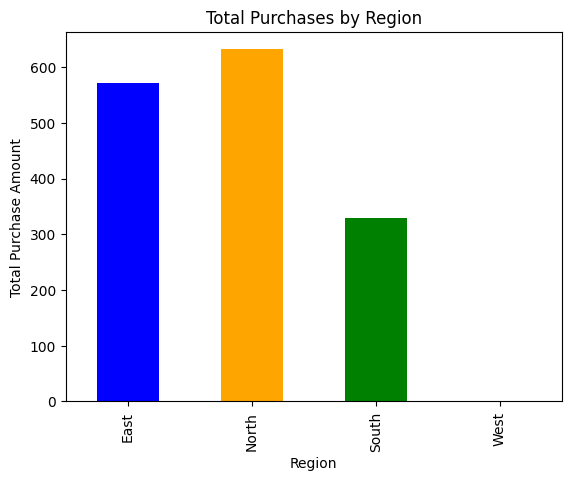

In [11]:
# Visualize the Results

import matplotlib.pyplot as plt

region_summary.plot(kind="bar", title="Total Purchases by Region", color=['blue', 'orange', 'green', 'red'])
plt.ylabel("Total Purchase Amount")
plt.xlabel("Region")
plt.show()

**Step 6: Save the Cleaned Datase**t


In [12]:
#Save the cleaned dataset for future use:
data.to_csv("cleaned_sales_data.csv", index=False)
print("\nCleaned Dataset Saved as cleaned_sales_data.csv")




Cleaned Dataset Saved as cleaned_sales_data.csv
